Rudimentary EDA into the labelled testing data

In [1]:
from pathlib import Path
import pandas as pd


# location of test_pairs_labelled.txt
test_pairs = Path.cwd().parent.joinpath('data/raw/test_pairs_labelled.txt')

# load test_pairs_labelled.txt, semi-colon is the separator used in the file 
test_pairs = pd.read_csv(test_pairs, sep = ';', header = None, names = ['ModuleCodes', 'Similarity'])

In [2]:
test_pairs

,ModuleCodes,Similarity
0,"[['MCD8007'], ['HIS3351']]",1.0
1,"[['EDU8231'], ['SPE1051']]",1.0
2,"[['MON2001'], ['ICM0100']]",0.0
3,"[['HSS8007'], ['SML9024']]",3.0
4,"[['TCP8902'], ['MCH3164', 'MCH8164']]",2.0
...,...,...
424,"[['CSC3632'], ['BIO8198']]",2.0
425,"[['MCH3086'], ['BIO8005']]",0.0
426,"[['SEL3393'], ['ACC4055']]",0.0
427,"[['GRN8708'], ['CEG2724']]",1.0


We repeat the explanation of the left column in the above table, as given in `2.0-lk-text-train-test-split.ipynb`:

> In the above, we have a series of lists that themselves contain lists. In the first case, `['MCD8007']` and `['HIS3351']` would have their catalogue entries compared and given an integer similarity from 0 (dissimilar) to 5 (essentially identical). Looking at the fifth case, we have `['TCP8902']` and `['MCH3164', 'MCH8164']`. `MCH3164` and `MCH8164` were grouped due to having high cosine similarity in their bag-of-words representations, classifying them as equivalent modules; they are nearly lexicographically identical. Thus, in this comparison, we would compare `TCP8902` with one of `MCH3164` or `MCH8164`; it doesn't matter which.
> 
> Each of the pairings contains two lists (commonly these lists are singleton). Thus to generalise the above idea, we compare *one* of the modules in the first list with *one* of the modules in the second list, per pairing, with the choice of module per list being non-significant.

Having now performed the labelling, we have the associated similarity labels for each module pairing in the second column of the table. Thus, in row `0`, modules `MCD8007` and `HIS3351` have been labelled with a similarity of `1`, from the set of possible labels (of increasing similarity) {0, 1, 2, 3, 4, 5}.

The labelling was performed by the principal investigator and supervisors of this project, totalling 3 people. Each person provided labels to a third of the above pairings and hence there are 3 disjoint subsets of the above set of modules. We will do some basic analysis here to see how the distributions of the 3 subsets behave.

In [3]:
# split the labelled pairs into the 3 disjoint subsets given by the distinct labellers
test_pairs_1 = test_pairs.iloc[:143, :]
test_pairs_2 = test_pairs.iloc[143:286, :]
test_pairs_3 = test_pairs.iloc[286:, :]

In [4]:
# get the counts of each similarity score, per pair subset
similarity_counts_1 = test_pairs_1.groupby('Similarity').count()
similarity_counts_2 = test_pairs_2.groupby('Similarity').count()
similarity_counts_3 = test_pairs_3.groupby('Similarity').count()

# column bind the counts
similarity_counts_all = pd.concat([similarity_counts_1, similarity_counts_2, similarity_counts_3], axis = 1)

# display the counts adjacently
similarity_counts_all

,ModuleCodes,ModuleCodes,ModuleCodes
Similarity,,,
0.0,57,89,97
1.0,56,34,26
2.0,15,11,14
3.0,11,6,4
4.0,4,3,1


Each of the subsets shows a positively skewed distribution of similarities. This is to be expected since the corpus of modules is quite diverse; the probability of two randomly selected modules being semantically similar is low. Interestingly, we note that no pairings were given a label of `5`, i.e. a semantically identical label. This indicates that, if they exist, semantically identical modules are likely to be very rare. Since modules with high cosine similarity in their bag-of-words representations have already been merged, it's possible that some non-duplicate but highly semantically similar modules were merged.

Summarisations of this form are generally easier to visualise graphically, which we now do, using bar plots.

<AxesSubplot:xlabel='Similarity'>

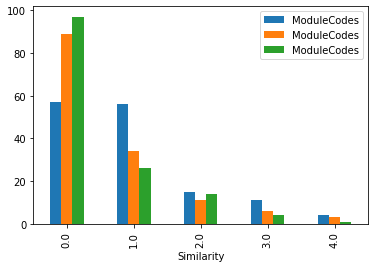

In [5]:
similarity_counts_all.plot.bar()

Evidently, subsets 2 and 3 are quite similar in how they are distributed across labels. Subset 1 is more distinct, with noticeably fewer 0 labels and more 1 labels. This could be due to subset 1 having less semantically dissimilar modules, but is more likely to be a cause of systematic (i.e. human) bias in each subset. This is a significant caveat of labelling being performed by multiple people, however it was necessary considering the time constraints of this project. Hopefully any difference in bias between the 3 subsets should not impact semantic textual similarity evaluation to a significant degree.